In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
%matplotlib inline
import pandas as pd

In [0]:
train = pd.read_csv("gdrive/My Drive/Colab Notebooks/sign_mnist_train.csv")

In [0]:
test = pd.read_csv("gdrive/My Drive/Colab Notebooks/sign_mnist_test.csv")

In [0]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [0]:
labels = train["label"].values

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb = LabelBinarizer()

In [0]:
labels = lb.fit_transform(labels)

In [0]:
images = train.iloc[:,1:].values

In [0]:
images.shape

(27455, 784)

In [0]:
images = images/255

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 53)

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [0]:
x_train.shape

(19218, 28, 28, 1)

In [0]:
y_train.shape

(19218, 24)

In [0]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [0]:
x_test.shape

(8237, 28, 28, 1)

In [0]:
y_test.shape

(8237, 24)

In [0]:
np.random.seed(0)

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1),))
  model.add(Dropout(0.4))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(24, activation = 'softmax'))
  model.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer="nadam")
  return model

In [0]:
lenet = le_net()
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
dropout_10 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [0]:
history = lenet.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=125,verbose=1,shuffle=1)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 5s 249us/step - loss: 2.2268 - acc: 0.3014 - val_loss: 1.4607 - val_acc: 0.6876
Epoch 2/10
19218/19218 [==============================] - 3s 178us/step - loss: 0.7582 - acc: 0.7446 - val_loss: 0.8202 - val_acc: 0.8147
Epoch 3/10
19218/19218 [==============================] - 3s 178us/step - loss: 0.3957 - acc: 0.8649 - val_loss: 0.4088 - val_acc: 0.9693
Epoch 4/10
19218/19218 [==============================] - 3s 179us/step - loss: 0.2345 - acc: 0.9179 - val_loss: 0.2943 - val_acc: 0.9732
Epoch 5/10
19218/19218 [==============================] - 3s 180us/step - loss: 0.1662 - acc: 0.9450 - val_loss: 0.1678 - val_acc: 0.9961
Epoch 6/10
19218/19218 [==============================] - 3s 177us/step - loss: 0.1177 - acc: 0.9625 - val_loss: 0.1209 - val_acc: 0.9979
Epoch 7/10
19218/19218 [==============================] - 3s 178us/step - loss: 0.0949 - acc: 0.9676 - val_loss: 0.0825 - v

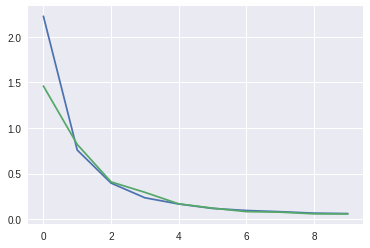

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

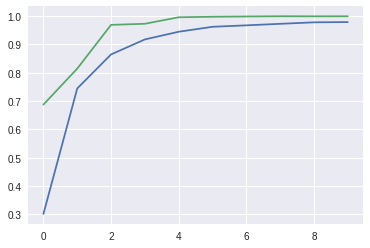

In [0]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

In [0]:
import requests
from PIL import Image
from io import BytesIO

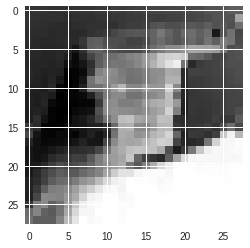

In [0]:
plt.imshow(x_train[0].reshape(28,28))

In [0]:
predict = lenet.predict_classes(images[2].reshape(1,28,28,1))

In [0]:
predict

array([2])

In [0]:
lenet.save('lenet.h5')